In [2]:
from ast import literal_eval

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from plot_functions import plot_t1_erros_analysis


# Experiment Evaluation for the Ensemble Calibration Test using different Modifications

### 1. evaluate the initial setup for different values of $K$

In [13]:
results_lambda_sampling_h0 = pd.read_csv('final_results_experiments_t1t2_lambda_h0.csv')
results_final = pd.read_csv('final_results_experiments_t1t2_alpha_100_10_10_0.01_lambda.csv')
results_final_3 = pd.read_csv('../../code_mira_von_thomas/final_results_experiments_t1t2_alpha_100_10_3_0.01.csv')
results_mcmc_1 = pd.read_csv('final_results_experiments_t1t2_mcmc_h0_r=100.csv')
results_lambda_1 = pd.read_csv('final_results_experiments_t1t2_lambda_h0_r=100.csv')
results_final_3

,NPBE_SKCEul,NPBE_HL5,NPBE_HL10,NPBE_CONFECE5,NPBE_CONFECE10,NPBE_CLASSECE5,NPBE_CLASSECE10
0,"[0.112, 0.285, 0.452, 0.645, 0.791, 0.944, 0.9...","[0.025, 0.061, 0.097, 0.154, 0.213, 0.259, 0.3...","[0.017, 0.047, 0.081, 0.118, 0.161, 0.199, 0.2...","[0.017, 0.04, 0.074, 0.118, 0.168, 0.216, 0.27...","[0.01, 0.028, 0.052, 0.076, 0.117, 0.15, 0.184...","[0.018, 0.056, 0.081, 0.12, 0.165, 0.225, 0.28...","[0.008, 0.021, 0.041, 0.075, 0.103, 0.153, 0.2..."
1,"[0.962, 0.852, 0.696, 0.482, 0.302, 0.119, 0.0...","[0.984, 0.913, 0.81, 0.698, 0.592, 0.485, 0.40...","[0.994, 0.977, 0.959, 0.9, 0.835, 0.756, 0.669...","[0.478, 0.292, 0.201, 0.143, 0.1, 0.071, 0.046...","[0.678, 0.505, 0.382, 0.287, 0.225, 0.175, 0.1...","[0.781, 0.6, 0.486, 0.383, 0.299, 0.232, 0.173...","[0.892, 0.791, 0.675, 0.561, 0.482, 0.398, 0.3..."
2,"[0.61, 0.44, 0.316, 0.207, 0.138, 0.053, 0.008...","[0.021, 0.009, 0.005, 0.002, 0.002, 0.001, 0.0...","[0.014, 0.004, 0.003, 0.003, 0.002, 0.002, 0.0...","[0.014, 0.006, 0.002, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0.019, 0.007, 0.003, 0.001, 0.0, 0.0, 0.0, 0....","[0.001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...","[0.003, 0.001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0..."


function for plotting:

In [3]:
def plot_t1_erros_analysis(df: pd.DataFrame, list_errors: list = ['CONFECE', 'CLASSECE'], sampling_method: str = 'lambda',
                            take_avg: bool = True, plot_ha: bool = False):

    alphas = df['alpha'].values
    results = np.zeros((len(list_errors), len(df)))
    for i in range(len(list_errors)):
        results_i = df[list_errors[i]]
        for j in range(len(df)):
            mean_ij = (sum(literal_eval(results_i[j]))/len(literal_eval(results_i[j])))
            results[i, j] = mean_ij

    
    if not plot_ha:
        fig, ax = plt.subplots(len(list_errors), 1, figsize=(8, 12))
        for j in range(len(list_errors)):
            ax[j].plot(alphas, results[j])
            ax[j].plot(alphas, alphas, '--')
            ax[j].set_title(f'{list_errors[j]}')
            ax[j].set_xlabel(r'$\alpha$')
            ax[j].set_ylabel(r'Type $1$ error')
            ax[j].grid()
        
        plt.suptitle(r'Type $1$ error analysis, sampling: {}'.format(sampling_method))

    else:
        raise NotImplementedError

    return fig
            
        


    

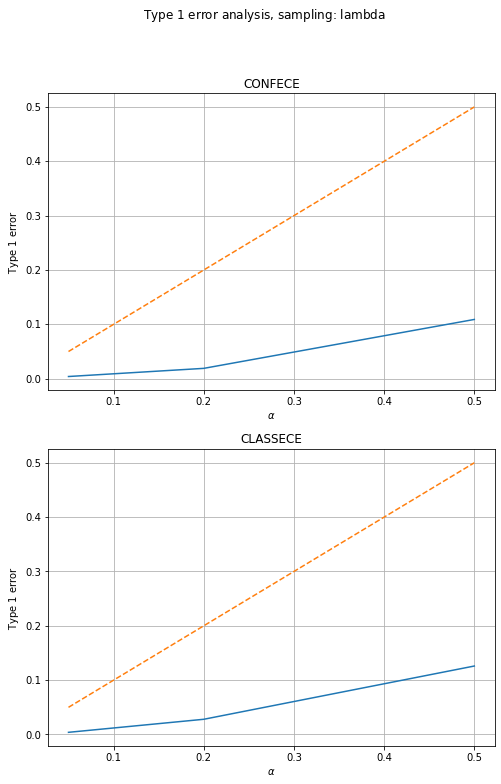

In [4]:
fig_lambdas = plot_t1_erros_analysis(results_lambda_sampling_h0)

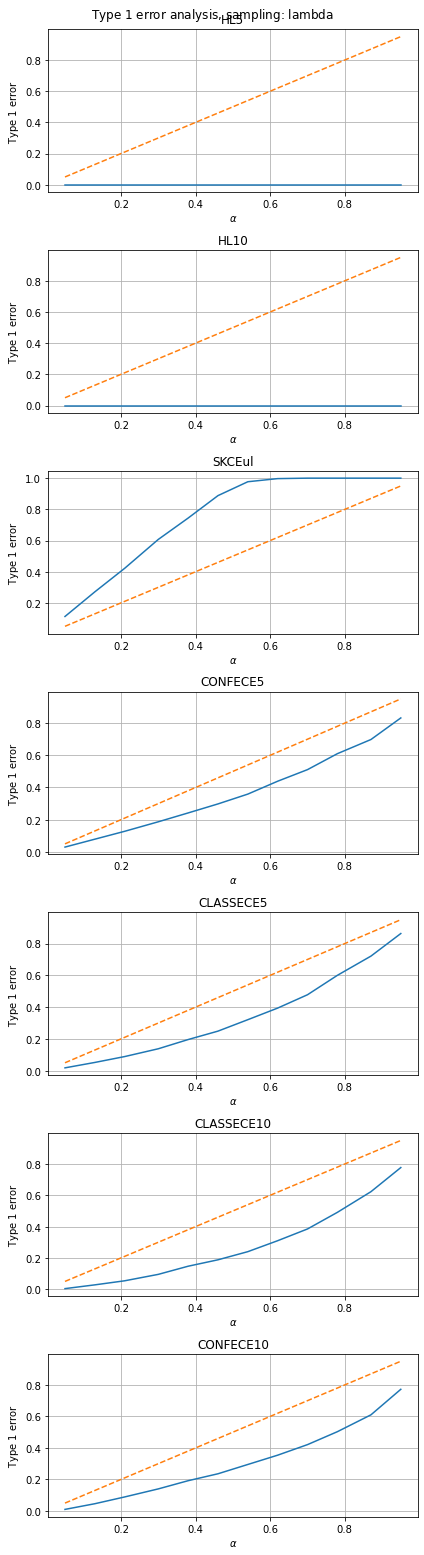

In [3]:
fig_lambdas_final = plot_t1_erros_analysis(results_final, list_errors=list(results_final.keys()), take_avg=False, figsize=(6, 22))

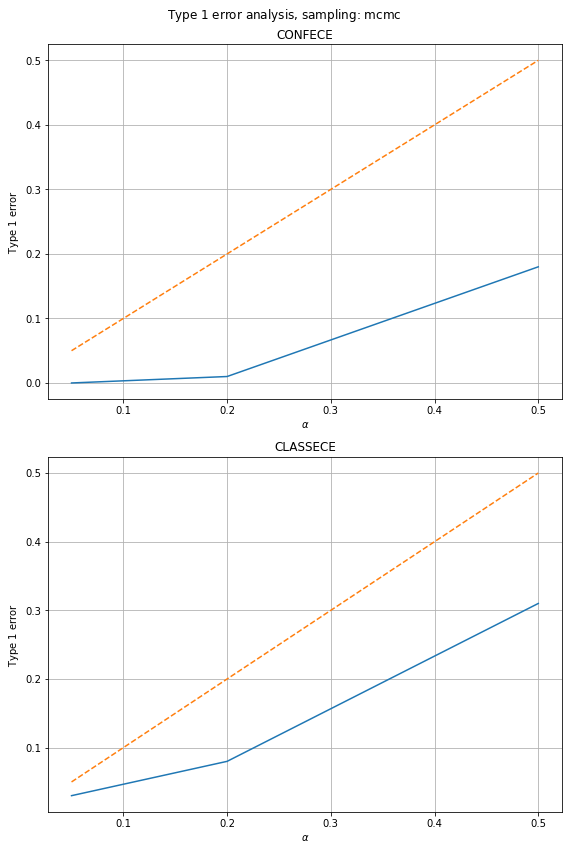

In [7]:
results_mcmc = plot_t1_erros_analysis(results_mcmc_1, sampling_method='mcmc')

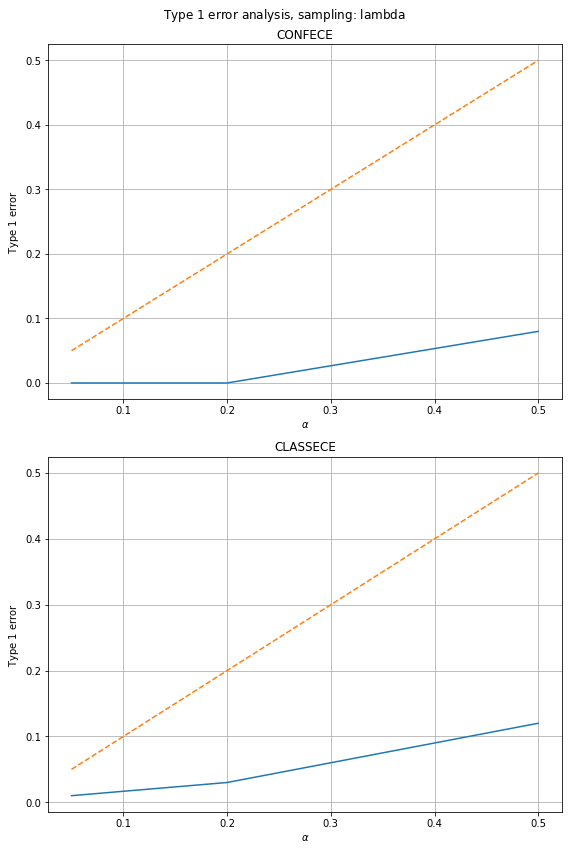

In [9]:
fig_lambda_1 = plot_t1_erros_analysis(results_lambda_1)

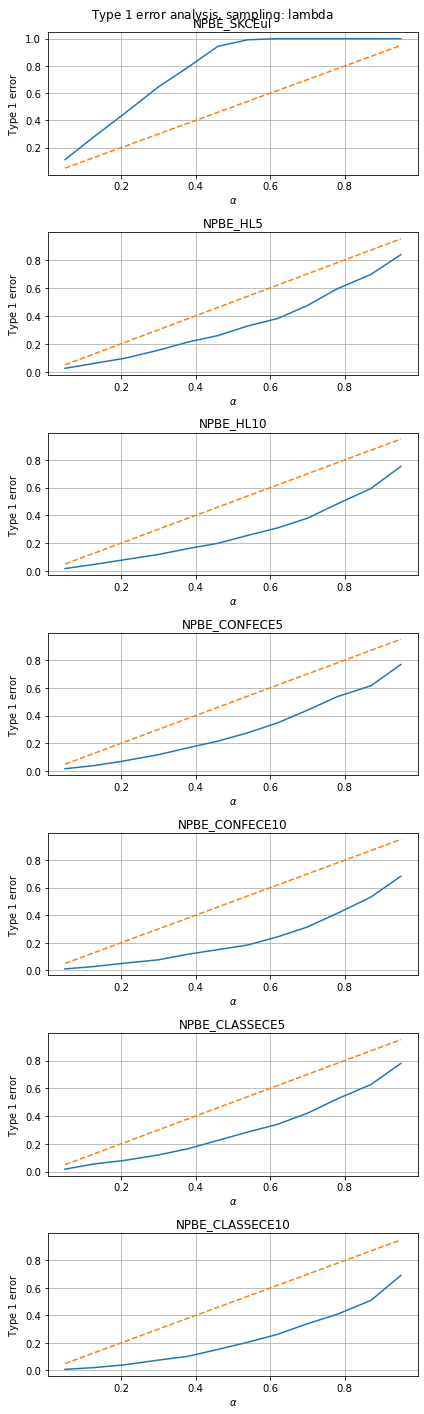

In [4]:
fig_lambda_final_3 = plot_t1_erros_analysis(results_final_3, list_errors=list(results_final_3.keys()), take_avg=False, figsize=(6, 20))